In [20]:
import os
import sys
import numpy as np
import pandas as pd
import csv
from ast import literal_eval # for mismap_score func
import difflib # diff btw 2 strings
from statistics import mean

In [21]:
sys.path.append("/Users/mariapalafox/Desktop/Toolbox/")
from all_funx import *

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

# makes display wider
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

# Pmap fig scratch notes
```python 
/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CANONICAL_number/

# interesting stable_entry uniprot IDs...not -1 for canonical 
canonical_NOT_1_IDs_fastavsidmap_288.csv # not -1 canonical in 10682 set with more than 1 id in idmapping file
canonical_NOT_1_IDs_in3991_56.csv # not -1 canonical entries in 3991 set

# bar graph, frequency plot 
x = canonical -# 
y = counts
"hist_canonical_num_counts_fasta2018_idmap2018.csv" # 10628
"hist_in3991_2507.csv" # subset version


# isoform counts
# analyze the labeled entry data does it represent the population it was drawn from
x = number of isoforms for a stable entry
# number of isoforms in proteome vs labeled set
x = cys lys abundance (more histogram shaped)
# abundance in proteome vs labeled set
y = counts
subsets = 3991, and all of ccds 18432, and knowledgebase
stack colors = knowledgebase vs 3991 labeled IDs
"isoformCounts_UKBstable_entry_fastawIsos_173324.csv"
# number of targets in entry with number of entries
MISMAP_SCORE_UniprotCanonical_3979entries_valueCounts_fromDict.csv

# MULTI MAPPING SECTION 3979 uniprot IDs
number of ENSP IDs linked to uniprot ID
distance between ensp and ukb seq
distance between ensp release vs other release
mean ENSP ID number for that entry

# scatterplot
mean number of ENSP linked to each entry vs number of isoforms for UKB ID

```


---
---
---
---
---
---

# hierarchial clustering

### PCA
## how do the 8939 stable ENSP shared across release relate
- length
- distance score to uniprot
- abundance counts
- 

- if all releases are really similar, then there should be very little seperation of dots
- color by release
- 8939 x 5



---
---
---
---
---
---

# SCATTER
## how does fraction missed score for uniprot IDs relate to continuous variables:
1. how does fraction missed score for uniprot IDs relate to mean number of ENSP IDs linked to a uniprot ID for all releases (mean and std)  
2. how does number of ENSP IDs releate to number of isoforms for that uniprot ID
3. 

dynamic slope score, relate to isoform # for that uniprot ID?
## aim is to address how dynamic slope scores may be driven by number of ENSP linked (higher std when comparing each release number) and answer how isoform number is releated to ENSP ID count (they should be related)

isoform_counts_UKB_groupedby_stable_entry_fasta_source_173324.csv
dynamicALL_summaryMULTIMAPPING_ENSPid_counts_stableEntry_3979.csv



---
---
---
---
---
---

## for showing correlations 'clustering' between protein sequences from each release
**theme = dimension reduction**
- PCA
- heatmaps
- t-SNE plots
- multi dimensional scaling (MDS)



---
---
---
---
---
---

# [done] heatmap of frac_missed scores for 3979 for each release
#### all ENSP linked to same 3979 for each release
#### only subset of ENSP linked to shared 1805 IDs across each release
#### subset of 8939 shared ENSP...how many IDs are they linked to?
- want to show which release was the worst for mapping cys and lys positions


---
---
---
---
---
---

# multimapping figure code
### idea 1: unique number of stable ENS IDs @ ENSG ENST ENSP levels to to 3979 uniprot IDs



In [8]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/TSV_UNIPROT_xref/")

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# multimapping figure module for Pmap
class mydict(dict):
    def __init__(self):
        self = dict()

    def add(self, key, value):
        self[key] = value

def countUniqueValues(df, colname):
    dict1 = mydict()
    dict2 = mydict()
    for i in colname:
        colum = df[i].tolist()
        setcol = set(colum)
        dict1.add(i, len(setcol))
        dict2.add(i, setcol)
    print(dict1)
    return(dict2)

# {'gene_stable_id': 4381, 'transcript_stable_id': 10272, 'protein_stable_id': 10272, 'xref': 3979}
def dictValueOverlap(d1, d2, d3, d4, d5):
    # loop over each level save value
    newdic = mydict()
    newdiclen = mydict()
    levs = ['gene_stable_id', 'transcript_stable_id', 'protein_stable_id']
    for i in levs:
        v1 = d1[i]
        v2 = d2[i]
        v3 = d3[i]
        v4 = d4[i]
        v5 = d5[i]
        overla = v1 & v2 & v3 & v4 & v5
        newdic.add(i, overla)
        newdiclen.add(i, len(overla))
    print(newdiclen)
    return newdic

In [19]:
# MAIN DEF

# stable ID columns
collist = ["gene_stable_id", "transcript_stable_id", "protein_stable_id", "xref"]

df85 = pd.read_csv("sharedv85_10272_uniqueENSP.csv")
df92 = pd.read_csv("sharedv92_10479_uniqueENSP.csv")
df94 = pd.read_csv("sharedv94_10699_uniqueENSP.csv")
df96 = pd.read_csv("sharedv96_10750_uniqueENSP.csv")
df97 = pd.read_csv("sharedv97_10650_uniqueENSP.csv")

dic85 = countUniqueValues(df85, collist)
dic92 = countUniqueValues(df92, collist)
dic94 = countUniqueValues(df94, collist)
dic96 = countUniqueValues(df96, collist)
dic97 = countUniqueValues(df97, collist)

dfoverlap = dictValueOverlap(dic85, dic92, dic94, dic96, dic97)
print(dfoverlap)

# {'gene_stable_id': 4170, 'transcript_stable_id': 8939, 'protein_stable_id': 8939}

{'gene_stable_id': 4381, 'transcript_stable_id': 10272, 'protein_stable_id': 10272, 'xref': 3979}
{'gene_stable_id': 4365, 'transcript_stable_id': 10479, 'protein_stable_id': 10479, 'xref': 3979}
{'gene_stable_id': 4378, 'transcript_stable_id': 10699, 'protein_stable_id': 10699, 'xref': 3979}
{'gene_stable_id': 4369, 'transcript_stable_id': 10750, 'protein_stable_id': 10750, 'xref': 3979}
{'gene_stable_id': 4369, 'transcript_stable_id': 10650, 'protein_stable_id': 10650, 'xref': 3979}
{'gene_stable_id': 4170, 'transcript_stable_id': 8939, 'protein_stable_id': 8939}
{'gene_stable_id': {'ENSG00000034152', 'ENSG00000122707', 'ENSG00000164062', 'ENSG00000105355', 'ENSG00000166165', 'ENSG00000083223', 'ENSG00000104881', 'ENSG00000114982', 'ENSG00000118939', 'ENSG00000117394', 'ENSG00000011376', 'ENSG00000107625', 'ENSG00000181472', 'ENSG00000186260', 'ENSG00000167515', 'ENSG00000178718', 'ENSG00000155111', 'ENSG00000100147', 'ENSG00000119471', 'ENSG00000138119', 'ENSG00000145779', 'ENSG0000

## idea 2: multimapping with stable and version ids from v97

In [24]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/DEPENDENTvsINDEPENDENT/")

In [25]:
df19 = "TF_37_truelabeled_before_5361_v97overlap_keyid2.csv"
df38 = "TF_38_truelabeled_before_5361_v97overlpa_keyid2.csv"
df1 = pd.read_csv(df19)
df2 = pd.read_csv(df38)

In [27]:
df1.columns

Index(['Gene stable ID', 'Gene stable ID version', 'Transcript stable ID',
       'Transcript stable ID version', 'Protein stable ID',
       'Protein stable ID version', 'CCDS ID', 'UniProtKB/Swiss-Prot ID',
       'stable_id2'],
      dtype='object')

In [31]:
df1.nunique()

Gene stable ID                  3642
Gene stable ID version          3642
Transcript stable ID            5361
Transcript stable ID version    5361
Protein stable ID               5361
Protein stable ID version       5361
CCDS ID                         5049
UniProtKB/Swiss-Prot ID         3636
stable_id2                      5361
dtype: int64

In [32]:
df2.nunique()

Gene stable ID                  3642
Gene stable ID version          3642
Transcript stable ID            5361
Transcript stable ID version    5361
Protein stable ID               5361
Protein stable ID version       5361
CCDS ID                         5049
UniProtKB/Swiss-Prot ID         3636
stable_id2                      5361
dtype: int64

In [33]:
# fixed error in dep vs indep markdown

---
---
---
---
---
---

# histograms to show distribution between two sets 
## 18,432 vs 3,991 (human proteome vs the part we have labeled)
- x = isoform counts for uniprot IDs
- x = cys and lys abundance

Rmerge_MISMAP_SCORED_allIdentity_3979UKBidsX5_19895rows_allReleases_49noCanonicalMatch_dynamicSlopeScores_colnames.csv

isoform_counts_UKB_groupedby_stable_entry_fasta_source_173324.csv

In [4]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/R_figures/")

# histograms distance scores of ENSP in each release to uniprot canonical sequences
## v85 vs v92 vs v94 vs v96 vs v97 
- want to show which release is most different from uniprot sequences and highlight v94 which i believe will be most similar to uniprot sequences
- need to group by ensembl and average distance for each uniprot ID in each release



# histograms number of ENSP IDs linked to same 3979 uniprot IDs in each release
## v85 vs v92 vs v94 vs v96 vs v97 
- want to show how similar each release is in terms of multimapping to uniprot 
- x = total number of ensp IDs linked to same set of 3979 uniprot IDs
- y = counts



In [85]:
dfconcat

,frac_missed_85,frac_missed_92,frac_missed_94,frac_missed_96,frac_missed_97
stable_entry,,,,,
A0AVT1,0.818182,0.818182,0.818182,0.818182,0.818182
A0FGR8,1.000000,1.000000,1.000000,1.000000,1.000000
A0JNW5,1.000000,1.000000,1.000000,1.000000,1.000000
A0MZ66,0.666667,1.000000,1.000000,1.000000,1.000000
A3KN83,1.000000,1.000000,1.000000,1.000000,1.000000
A4D1E9,1.000000,1.000000,1.000000,1.000000,1.000000
A4D1F6,1.000000,1.000000,1.000000,1.000000,1.000000
A5YKK6,0.666667,0.666667,0.666667,0.666667,0.666667
A6NC98,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# 3d histograms 
# x = 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


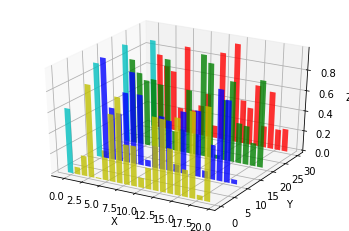

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show(ax)

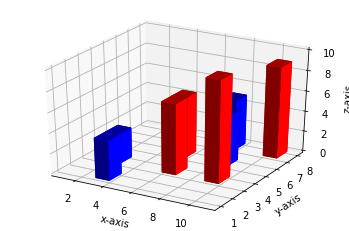

In [42]:
#style.use('ggplot2') 
# create a new figure for plotting 
fig = plt.figure() 
# create a new subplot on our figure 
ax1 = fig.add_subplot(111, projection='3d')   
# defining x, y, z co-ordinates for bar position 
x = [1,2,3,4,5,6,7,8,9,10] 
y = [4,3,1,6,5,3,7,5,3,7] 
z = np.zeros(10) 
  
# size of bars 
dx = np.ones(10)              # length along x-axis 
dy = np.ones(10)              # length along y-axs 
dz = [1,3,4,2,6,7,5,5,10,9]   # height of bar 
  
# setting color scheme 
color = [] 
for h in dz: 
    if h > 5: 
        color.append('r') 
    else: 
        color.append('b') 
  
# plotting the bars 
ax1.bar3d(x, y, z, dx, dy, dz, color = color) 
  
# setting axes labels 
ax1.set_xlabel('x-axis') 
ax1.set_ylabel('y-axis') 
ax1.set_zlabel('z-axis') 
  
plt.show()

In [39]:
fig = plt.figure() 
# create a new subplot on our figure 
ax1 = fig.add_subplot(111, projection='3d')   
# defining x, y, z co-ordinates for bar position 
x = dfconcat.stable_entry.tolist() 
y = ['v85','v92','v94','v96','v97'] 
z = np.zeros(10) 
  
# size of bars 
dx = np.ones(10)              # length along x-axis 
dy = np.ones(10)              # length along y-axs 
dz = [1,3,4,2,6,7,5,5,10,9]   # height of bar 
  
# setting color scheme 
color = [] 
for h in dz: 
    if h > 5: 
        color.append('r') 
    else: 
        color.append('b') 
  
# plotting the bars 
ax1.bar3d(x, y, z, dx, dy, dz, color = color) 
  
# setting axes labels 
ax1.set_xlabel('x-axis') 
ax1.set_ylabel('y-axis') 
ax1.set_zlabel('z-axis') 
  
plt.show()

[0.35771194 0.30082534 2.35468053 3.62784215 1.32878162 2.82975673
 2.67250644 1.70497146 0.13912009 2.3354592  0.61316503 0.97984052
 1.2776734  2.25167504 2.98310011 2.75794418 2.95659249 3.599076
 2.06718359 1.2099411  1.15023414 3.17216358 0.18598511 1.86208961
 3.84019418 1.15169173 3.46207211 0.93956825 3.67209865 0.0257714
 2.005263   3.85992356 3.74901953 1.7269195  2.491298   2.80346716
 0.66098157 3.7150806  2.03343398 3.02796083 1.82657055 1.04919156
 3.43141074 1.79492642 3.44322659 0.61657367 0.99898836 1.15825558
 0.93631399 2.13362291 3.86901697 2.62557076 3.94678354 3.50648769
 2.0165922  3.42480405 1.32492312 0.90628079 1.36365272 1.21047978
 3.88747333 0.0213     1.03729909 2.73248996 3.36232866 2.56992214
 1.97515893 1.84154071 2.27925239 2.94865011 1.90388613 1.50975411
 1.50121001 0.42348225 2.74922619 0.18584675 0.65908452 1.60469932
 1.58522113 0.18817397 0.27087114 2.47169264 3.02867753 1.94620539
 2.79088583 3.48942907 3.50138298 3.28820004 0.26588319 1.7927975

In [36]:
dfconcat.head(2)

,stable_entry,frac_missed_85,frac_missed_92,frac_missed_94,frac_missed_96,frac_missed_97
0,A0AVT1,0.818182,0.818182,0.818182,0.818182,0.818182
1,A0FGR8,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
zpos=np.zeros(dfconcat.shape).flatten() # 9025 len
len(zpos)

9025

In [66]:
dx = 0.5 * np.ones_like(zpos)
print(len(dx))
print(dx)

9025
[0.5 0.5 0.5 ... 0.5 0.5 0.5]


In [69]:
len(dfconcat.index.tolist() * 5)

9025

In [83]:
dfconcat.shape

(1805, 5)

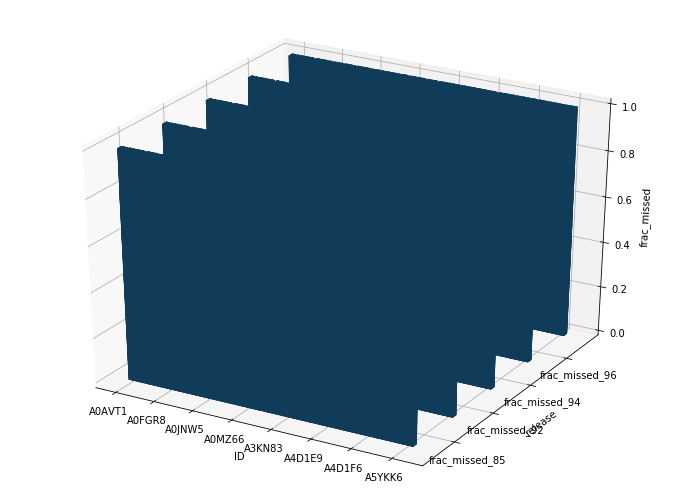

In [84]:
xpos=np.arange(dfconcat.shape[0]) # 0-1804
ypos=np.arange(dfconcat.shape[1]) # 0-4
yposM, xposM = np.meshgrid(ypos+0.5, xpos+0.5)
zpos=np.zeros(1805*5).flatten() # 9025 len

#dx = 0.5 * np.ones_like(zpos)
dx = np.zeros_like(zpos)
#dfconcat.index.tolist() * 5
dy= 0.1 * np.ones_like(zpos)
dz=dfconcat.values.ravel()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

#v = np.linspace(0.2, 1., xposM.ravel().shape[0])
#colors = plt.cm.rainbow(values)

ax.bar3d(xposM.ravel(),yposM.ravel(),zpos,dx,dy,dz)# color=colors, alpha=0.5


# ticks_x = np.arange(0.5, 24, 1)
# ax.set_xticks(ticks_x)
# ticks_y=np.arange(0.6,3,1)
# ax.set_yticks(ticks_y)

ax.w_xaxis.set_ticklabels(dfconcat.index)
ax.w_yaxis.set_ticklabels(dfconcat.columns)

ax.set_xlabel('ID')
ax.set_ylabel('release')
ax.set_zlabel('frac_missed')
#plt.xticks(ticks_x, xxid)
plt.show()

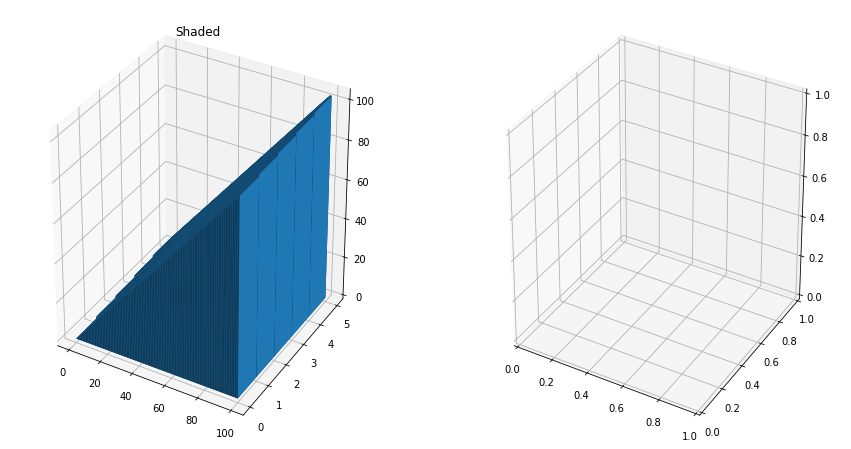

In [74]:

# setup the figure and axes
fig = plt.figure(figsize=(20, 13)
ax1 = fig.add_subplot(121, projection='3d')
# data dimensions
_x = len(dfconcat.index.tolist()) # np.arange(3979)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')


plt.show()

In [78]:
# fake data
_x = np.arange(4)
_y = np.arange(5)
print(_x)
print(_y)
_xx, _yy = np.meshgrid(_x, _y)
print(_xx)
print()
print(_yy)
x, y = _xx.ravel(), _yy.ravel()
print(x)
print(y)

[0 1 2 3]
[0 1 2 3 4]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]


In [79]:
top = x + y
print(top)
bottom = np.zeros_like(top)
print(bottom)

width = depth = 1

[0 1 2 3 1 2 3 4 2 3 4 5 3 4 5 6 4 5 6 7]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
xxid = dfconcat.stable_entry.tolist()

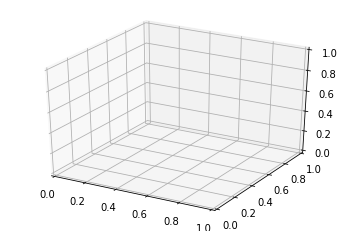

In [37]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ig = plt.figure()
ax = plt.axes(projection='3d')

In [55]:
df85 = pd.read_csv("groupedMISMAP_score_85_FALSEidentity_1805.csv")
print(df85.shape)
df92 = pd.read_csv("groupedMISMAP_score_92_FALSEidentity_1805.csv")
print(df92.shape)
df94 = pd.read_csv("groupedMISMAP_score_94_FALSEidentity_1805.csv")
print(df94.shape)
df96 = pd.read_csv("groupedMISMAP_score_96_FALSEidentity_1805.csv")
print(df96.shape)
df97 = pd.read_csv("groupedMISMAP_score_97_FALSEidentity_1805.csv")
print(df97.shape)
print(df97.columns)

(1805, 6)
(1805, 6)
(1805, 6)
(1805, 6)
(1805, 6)
Index(['UniProtID', 'total_targets', 'found_count', 'missed_count',
       'frac_found', 'frac_missed'],
      dtype='object')


In [56]:
df85 = df85[['UniProtID','frac_missed']].copy()
df92 = df92[['UniProtID','frac_missed']].copy()
df94 = df94[['UniProtID','frac_missed']].copy()
df96 = df96[['UniProtID','frac_missed']].copy()
df97 = df97[['UniProtID','frac_missed']].copy()
df85.columns = ['stable_entry','frac_missed_85']
df92.columns = ['stable_entry','frac_missed_92']
df94.columns = ['stable_entry','frac_missed_94']
df96.columns = ['stable_entry','frac_missed_96']
df97.columns = ['stable_entry','frac_missed_97']
df85.set_index('stable_entry',inplace=True)
df92.set_index('stable_entry',inplace=True)
df94.set_index('stable_entry',inplace=True)
df96.set_index('stable_entry',inplace=True)
df97.set_index('stable_entry',inplace=True)

In [57]:
dfconcat = pd.concat([df85,df92,df94,df96,df97],axis=1)

In [58]:
dfconcat.head(3)

,frac_missed_85,frac_missed_92,frac_missed_94,frac_missed_96,frac_missed_97
stable_entry,,,,,
A0AVT1,0.818182,0.818182,0.818182,0.818182,0.818182
A0FGR8,1.000000,1.000000,1.000000,1.000000,1.000000
A0JNW5,1.000000,1.000000,1.000000,1.000000,1.000000
